$$
\large \textbf{Problema 02}
$$

Se tiene una barra delgada de aluminio, originalmente a $0\:°C$, cuyos extremos se someten repentinamente a temperaturas fijas. El extremo izquierdo se mantiene a una temperatura constante de $100\:°C$ y el derecho a $50\:°C$. Utilice los métodos explícito e implícito (Crank-Nicolson) de diferencias finitas para calcular la evolución de la distribución de temperaturas en función del tiempo. Tome que la barra tiene $10\:cm$ de longitud y $k\:=\:0.835\:\frac{cm^2}{s}$ (aluminio). Haga los cálculos para $Δx\:=\:2\:cm$ y $Δt\:=\:0.1\:s$. Repítalos para $Δt\:=\:5\:s$ y compare sus resultados. Analice el comportamiento de la solución para los distintos regímenes.
***

In [1]:
import numpy as np                # Librería de álgebra lineal
import matplotlib.pyplot as plt   # Librería de gráficos
plt.rc('figure', figsize=(10,7))
plt.rc('font', size=14)
import copy

## Datos del problema

In [2]:
N = 6
long = 10         # cm
k = 0.835         # cm^2/s
dt = 5            # s
dx = long/(N-1)   # cm

print('dx =', dx, 'cm')

dx = 2.0 cm


In [3]:
T0izq = 100       # °C
T0der = 50        # °C
tol = 0.01

Pm = round(N/2)
b = T0izq
m = (T0der-T0izq)/(N-1)
Tm = m*Pm+b
print('Temperatura de corte en el nodo N =', Pm,'es', Tm, '°C')

Temperatura de corte en el nodo N = 3 es 70.0 °C


In [4]:
lam = k*dt/dx**2

Función que aplica una multiplicación matricial $T = M \cdot T$ hasta llegar a un error relativo 'tol' entre la temperatura  en el nodo 'Pm' y la 'Tm' teórica:

In [5]:
def solveT(T, M, tol):
    Er = 1
    T_matriz = copy.copy(T)
    while Er > tol:
        T = M.dot(T)
        Er = abs(T[Pm]-Tm)/Tm
        T_matriz = np.append(T_matriz, T, axis=1)
    return T_matriz

## Método explícito

Este método obtiene, a partir de las temperaturas a un tiempo $t$, las correspondientes a $(t+\Delta t)$. Llamando $T_i^l=T(x_i,t_l)$:

$$
T_i^{l+1} = \lambda T_{i+1}^l+(1-2\lambda)\:T_i^l+\lambda T_{i-1}^l
$$

con $\lambda = \frac{k\:\Delta t}{\Delta x^2}$.

In [6]:
if lam > 0.5:
    print('El método no es estable.')

El método no es estable.


In [7]:
M = np.eye(N)
for k in range(1, N-1):
    M[k,k] = 1-2*lam
    M[k,k-1] = lam
    M[k,k+1] = lam

In [8]:
x = np.linspace(0, long, N)
T = np.zeros([N,1])
T[0] = T0izq
T[-1] = T0der

In [9]:
T_matriz = solveT(T, M, tol)

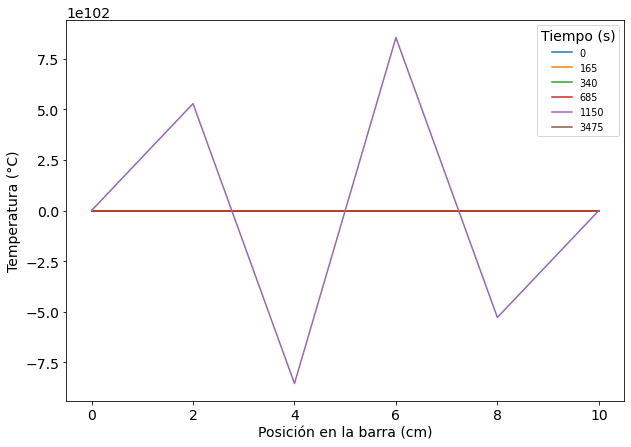

In [10]:
Ncol = np.shape(T_matriz)[1]

plt.plot(x, T_matriz[:,0], label=0)
for i in [1/20, 1/10, 1/5, 1/3, 1]:
    col = round(i*Ncol)-1
    plt.plot(x, T_matriz[:,col], label=round((col-1)*dt, 1))

plt.legend(title='Tiempo (s)', loc=1, fontsize='x-small')
plt.xlabel('Posición en la barra (cm)')
plt.ylabel('Temperatura (°C)')
plt.show()

## Método implícito de Crank-Nicolson

Llamando $T_i^l=T(x_i,t_l)$:

$$
-\lambda\:T_{i-1}^{l+1}+(1+2\lambda)\:T_i^{l+1}-\lambda\:T_{i+1}^{l+1} = \lambda\:T_{i-1}^l+2(1-\lambda)\:T_i^l+\lambda\:T_{i+1}^l
$$

con $\lambda = \frac{k\:\Delta t}{\Delta x^2}$.

In [11]:
A = np.eye(N)
for k in range(1, N-1):
    A[k,k] = 2*(1+lam)
    A[k,k-1] = -lam
    A[k,k+1] = -lam

B = np.eye(N)
for k in range(1, N-1):
    B[k,k] = 2*(1-lam)
    B[k,k-1] = lam
    B[k,k+1] = lam

M = np.linalg.inv(A).dot(B)

In [12]:
x = np.linspace(0, long, N)
T = np.zeros([N,1])
T[0] = T0izq
T[-1] = T0der

In [13]:
T_matriz = solveT(T, M, tol)

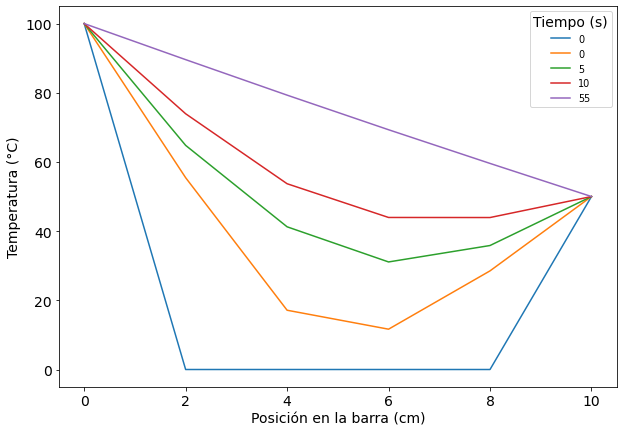

In [14]:
Ncol = np.shape(T_matriz)[1]

plt.plot(x, T_matriz[:,0], label=0)
for i in [1/8, 1/5, 1/3, 1]:
    col = round(i*Ncol)-1
    plt.plot(x, T_matriz[:,col], label=round((col-1)*dt, 1))

plt.legend(title='Tiempo (s)', loc=1, fontsize='x-small')
plt.xlabel('Posición en la barra (cm)')
plt.ylabel('Temperatura (°C)')
plt.show()